In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [4]:
datatrain_addr =  "D:\\CLASS\\ARTIFICIAL INTELLIGENCE\\CNN-BÀI TẬP VỀ NHÀ ANN\\FACE_ID\\training_data"

In [5]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
training_data=data_generator.flow_from_directory(datatrain_addr,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)

Found 136 images belonging to 2 classes.


In [7]:
validation_data = data_generator.flow_from_directory(datatrain_addr,
                                     target_size=(150,150),
                                     batch_size=20,
                                     class_mode='categorical',
                                     subset="validation",
                                     shuffle=True,)

Found 33 images belonging to 2 classes.


In [8]:
training_data.class_indices

{'not tri': 0, 'tri': 1}

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(training_data, batch_size = 20,epochs=50,verbose=1,validation_data=validation_data )

Epoch 1/50
7/7 [==============================] - 4s 452ms/step - loss: 42.5994 - accuracy: 0.5294 - val_loss: 34.3155 - val_accuracy: 0.6364
Epoch 2/50
7/7 [==============================] - 3s 372ms/step - loss: 12.9979 - accuracy: 0.7647 - val_loss: 2.4430 - val_accuracy: 0.6364
Epoch 3/50
7/7 [==============================] - 3s 392ms/step - loss: 2.1789 - accuracy: 0.8897 - val_loss: 4.0024e-06 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 3s 361ms/step - loss: 1.3406 - accuracy: 0.9265 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 2s 328ms/step - loss: 0.4810 - accuracy: 0.9632 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 2s 308ms/step - loss: 4.3968e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 2s 321ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accura

In [11]:
score = model.evaluate(validation_data)

2/2 [==============================] - 0s 99ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [15]:
model.save("nhandang1mat.h5")

In [17]:
test_data = "D:\\CLASS\\ARTIFICIAL INTELLIGENCE\\CNN-BÀI TẬP VỀ NHÀ ANN\\FACE_ID\\testing_data"
test = ImageDataGenerator(rescale=1./255)

In [21]:
    testing_data=test.flow_from_directory(
        test_data,
        target_size=(150,150),
        batch_size=4,
        class_mode='categorical',
        shuffle=False, 
    )

Found 12 images belonging to 1 classes.


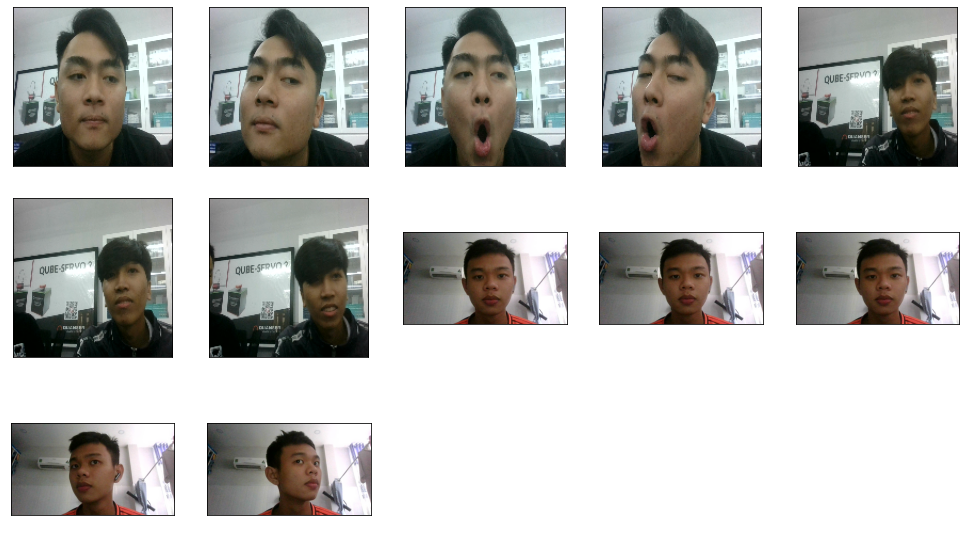

In [22]:
results={ 0:'not tri',1:'tri'}

model = load_model("nhandang1mat.h5")
pred = model.predict(testing_data)
plt.figure(figsize=(17,17))
for i in range(pred.shape[0]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(testing_data.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])], color = 'white')
plt.show()